[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **CAP-340 Problemas Inversos**
## **Esta atividade trata da identificação da condição inicial no problema de condução de calor em uma barra metálica usando um algoritmo genético (AG), em que para formulação do problema inverso, o problema é tratado como um problema de otimização**

**Docente:** *Prof. Dr. Haroldo Fraga de Campos Velho*

**Discente:** *Lourenço José Cavalcante Neto*

---


<img src="https://github.com/lourencocavalcante/CAP-340-Problemas-Inversos/blob/main/Exerc_parte1.PNG?raw=true" width = 800 align="center">
<img src="https://github.com/lourencocavalcante/CAP-340-Problemas-Inversos/blob/main/Exerc_parte2.PNG?raw=true" width = 800 align="center">

### O objetivo é calcular a evolução da temperatura ao longo da barra e compará-la com medições obtidas em sensores ao longo da barra. As medições são obtidas adicionando ruído uniforme às temperaturas simuladas

## 1. Resolver o problema direto da equação do calor

Para resolver este item, o código abaixo código implementa a solução do problema direto da equação do calor em uma barra de metal, utilizando o método de diferenças finitas. A equação diferencial parcial descrita modela a evolução temporal da temperatura ao longo da barra, considerando difusividade térmica constante e extremidades isoladas.

## Cálculo do ***T_mod*** (***Temperatura simulada***), para poder se ter a **T_obs** (***Temperatura observada***) usando a condição inicial:

### ***f(x) = sin(pi * x)***

In [16]:
#Bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do problema
Lx = 10.0         # Comprimento da barra
alpha = 0.01     # Difusividade térmica
dx = 0.1         # Passo espacial
dt = 0.1        # Passo temporal #1e-4
tau = 0.01       # Tempo total da simulação (tempo)
nx = int(Lx / dx) + 1  # Número de pontos espaciais
nt = int(tau / dt)     # Número de passos de tempo
r = alpha * dt / dx**2  # Número de Courant

In [17]:
# Inicialização das temperaturas
x = np.linspace(0, Lx, nx)  # Posições espaciais
T = np.zeros(nx)  # Temperatura inicial
T_new = np.zeros(nx)  # Nova temperatura

# Condição inicial: f(x) = sin(2 * pi * x / Lx)
T[:] = np.sin(2 * np.pi * x / Lx)  # Condição inicial, agora com o vetor x

# Diferenças finitas explícitas para resolver o problema
for n in range(0, nt):
    for i in range(1, nx - 1):  # Ignora as extremidades
        T_new[i] = T[i] + r * (T[i - 1] - 2 * T[i] + T[i + 1])

    # Condições de contorno (fixas) - de Dirichlet
    T_new[0] = 0  # Temperatura na extremidade esquerda fixada
    T_new[-1] = 0  # Temperatura na extremidade direita fixada

    # Atualiza o valor de T para o próximo passo de tempo
    T[:] = T_new[:]


In [18]:
# Aqui criamos um array numérico chamado x que representa os pontos
# igualmente espaçados ao longo da barra de comprimento Lx

# Posições e condição inicial verdadeira
x = np.linspace(0, Lx, int(Lx / dx) + 1)     # Posições discretizadas
#true_initial_condition = np.sin(np.pi * x)  # Condição inicial
#true_initial_condition = np.sin(2 * np.pi * x / Lx)  # Condição inicial
true_initial_condition = np.sin(2 * np.pi * x / Lx)  # Condição inicial

print(f'\nCondição inicial:{true_initial_condition}')


Condição inicial:[ 0.00000000e+00  6.27905195e-02  1.25333234e-01  1.87381315e-01
  2.48689887e-01  3.09016994e-01  3.68124553e-01  4.25779292e-01
  4.81753674e-01  5.35826795e-01  5.87785252e-01  6.37423990e-01
  6.84547106e-01  7.28968627e-01  7.70513243e-01  8.09016994e-01
  8.44327926e-01  8.76306680e-01  9.04827052e-01  9.29776486e-01
  9.51056516e-01  9.68583161e-01  9.82287251e-01  9.92114701e-01
  9.98026728e-01  1.00000000e+00  9.98026728e-01  9.92114701e-01
  9.82287251e-01  9.68583161e-01  9.51056516e-01  9.29776486e-01
  9.04827052e-01  8.76306680e-01  8.44327926e-01  8.09016994e-01
  7.70513243e-01  7.28968627e-01  6.84547106e-01  6.37423990e-01
  5.87785252e-01  5.35826795e-01  4.81753674e-01  4.25779292e-01
  3.68124553e-01  3.09016994e-01  2.48689887e-01  1.87381315e-01
  1.25333234e-01  6.27905195e-02  1.22464680e-16 -6.27905195e-02
 -1.25333234e-01 -1.87381315e-01 -2.48689887e-01 -3.09016994e-01
 -3.68124553e-01 -4.25779292e-01 -4.81753674e-01 -5.35826795e-01
 -5.877

In [19]:
# Função para resolver a equação do calor usando diferenças finitas explícitas
def solve_heat_equation(f):
    """
    Esta função serve para resolver numericamente a equação do calor ao longo do tempo.
    Retorna a temperatura final T no tempo t = tau.
    """
    nx = len(f)                # Número de pontos espaciais
    dx = Lx / (nx - 1)         # Reajuste do passo espacial
    dt = 0.01  #1e-4           # Passo temporal para estabilidade
    nt = int(tau / dt)         # Número de passos no tempo
    r = alpha * dt / dx**2     # Número de Courant

    # Inicialização das temperaturas
    T = np.zeros((nt, nx))     # Matriz para armazenar as temperaturas no tempo
    T[0, :] = f                # Define a condição inicial


    # Método explícito para atualiza a temperatura no tempo
    for n in range(0, nt - 1):
        T[n + 1, 1:-1] = T[n, 1:-1] + r * (T[n, :-2] - 2 * T[n, 1:-1] + T[n, 2:])

    return T[-1, :]  # Retorna T final no tempo tau


# Solução do problema direto
final_temperature = solve_heat_equation(true_initial_condition)


print("x       T(x)")
print("-" * 20)
for xi, Ti in zip(x, final_temperature):
    print(f"{xi:.4f}  {Ti:.4f}")



x       T(x)
--------------------
0.0000  0.0000
0.1000  0.0628
0.2000  0.1253
0.3000  0.1874
0.4000  0.2487
0.5000  0.3090
0.6000  0.3681
0.7000  0.4258
0.8000  0.4818
0.9000  0.5358
1.0000  0.5878
1.1000  0.6374
1.2000  0.6845
1.3000  0.7290
1.4000  0.7705
1.5000  0.8090
1.6000  0.8443
1.7000  0.8763
1.8000  0.9048
1.9000  0.9298
2.0000  0.9511
2.1000  0.9686
2.2000  0.9823
2.3000  0.9921
2.4000  0.9980
2.5000  1.0000
2.6000  0.9980
2.7000  0.9921
2.8000  0.9823
2.9000  0.9686
3.0000  0.9511
3.1000  0.9298
3.2000  0.9048
3.3000  0.8763
3.4000  0.8443
3.5000  0.8090
3.6000  0.7705
3.7000  0.7290
3.8000  0.6845
3.9000  0.6374
4.0000  0.5878
4.1000  0.5358
4.2000  0.4818
4.3000  0.4258
4.4000  0.3681
4.5000  0.3090
4.6000  0.2487
4.7000  0.1874
4.8000  0.1253
4.9000  0.0628
5.0000  0.0000
5.1000  -0.0628
5.2000  -0.1253
5.3000  -0.1874
5.4000  -0.2487
5.5000  -0.3090
5.6000  -0.3681
5.7000  -0.4258
5.8000  -0.4818
5.9000  -0.5358
6.0000  -0.5878
6.1000  -0.6374
6.2000  -0.6845
6.3000  -

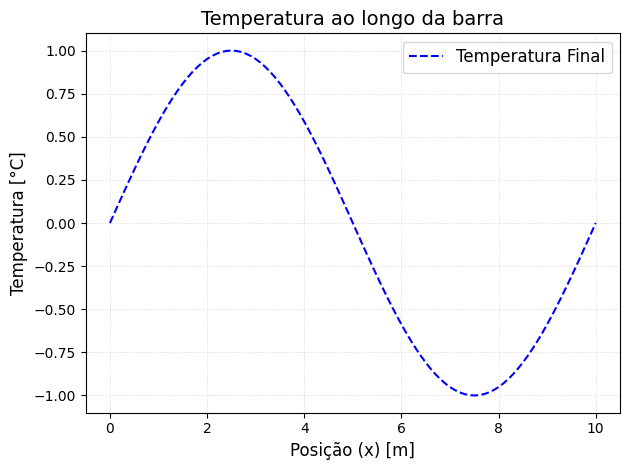

In [20]:
# Gráfico com estilo científico
# plt.style.use("seaborn-muted")  # Escolha de estilo opcional

plt.plot(x, final_temperature, color="blue", linestyle="--", label="Temperatura Final")
plt.xlabel("Posição (x) [m]", fontsize=12)  # Rótulo do eixo X, unidades de metros
plt.ylabel("Temperatura [°C]", fontsize=12)  # Rótulo do eixo Y, unidades de Celsius
plt.title("Temperatura ao longo da barra", fontsize=14)
plt.grid(True, linestyle=":", linewidth=0.5, alpha=0.7)  # Grid sutil para maior clareza
plt.legend(loc="best", fontsize=12)  # Legenda com fonte de tamanho adequado
plt.tight_layout()  # Ajuste automático do layout para evitar sobreposição

# Exibição do gráfico
plt.show()

# Salvamento do gráfico
# plt.savefig("distribuicao_temperatura.png", dpi=300)


### Vamos verificar as condições de contorno

Após obtermos a solução do problema direto, vamos realizar a verificação das condições de contorno, dadas por:

In [21]:
# Verificação das condições de contorno
def check_conditions(T_final, dx):
    """
    Verifica se as condições de contorno
    são satisfeitas nas extremidades da barra.
    """
    left_derivative = (T_final[1] - T_final[0]) / dx  # Derivada à esquerda (x=0)
    right_derivative = (T_final[-1] - T_final[-2]) / dx  # Derivada à direita (x=Lx)


    print(f"\nDerivada na extremidade esquerda (x=0): {left_derivative:.5f}")
    print(f"Derivada na extremidade direita (x=Lx): {right_derivative:.5f}")

    # Retornando os valores para análises adicionais
    return left_derivative, right_derivative

# Verificar após a solução do problema direto
left_d, right_d = check_conditions(final_temperature, dx)


Derivada na extremidade esquerda (x=0): 0.62791
Derivada na extremidade direita (x=Lx): 0.62791



* Nas condições implementadas, as extremidades x=0 e x=Lx **não podem trocar calor** com o ambiente externo.
* Isso significa que a temperatura em T(0) e T(Lx) é ajustada para ser **igual ao ponto vizinho mais próximo**.
* Essa condição força os valores em x=0 e x=Lx a se **equalizarem** ao longo do tempo..


## 2. Construir o conjunto de soluções candidatas (200)

In [22]:
population_size = 200  # Número de indivíduos na população

def initialize_population(size, length):
    """
    Gera uma população inicial de soluções candidatas aleatórias no intervalo [-1, 1].
    """
    return [np.random.uniform(-1, 1, length) for _ in range(size)]

# Teste da função: Geração da população inicial
length = len(x)  # Número de pontos na barra
population = initialize_population(population_size, length)

# Visualizar as primeiras 5 soluções candidatas
print("Primeiras 5 soluções candidatas, das 200:")
for i in range(5):
    print(population[i])


Primeiras 5 soluções candidatas, das 200:
[ 0.64731581  0.3905742  -0.2086892  -0.65285401 -0.28543533 -0.0960109
  0.60625132  0.36990829  0.28230739 -0.56443123  0.52810249  0.51062607
  0.35716592  0.08167054 -0.61045155  0.64568561 -0.55875591  0.62054966
  0.72902847 -0.62451306  0.02479973  0.42530597  0.87453776  0.50311454
  0.30639322  0.00897974 -0.35708785  0.87443632 -0.35901478  0.6037828
  0.60402939  0.31292396  0.02121026  0.93289862  0.56477171 -0.27939336
  0.29088064  0.38483594  0.59084766  0.82369208 -0.976747   -0.47336094
  0.31524755 -0.31046047 -0.4432617   0.6342402   0.81820209 -0.29345387
 -0.44217474 -0.06081636 -0.29294962 -0.62059387 -0.64637042  0.65450861
 -0.50469514  0.96666854  0.57229836 -0.45140421 -0.69163825  0.85232064
 -0.89126435  0.73701886 -0.16303315  0.84026449 -0.19679321 -0.01827484
  0.71790217  0.59153227  0.35901865  0.06344916 -0.43314648  0.27149018
 -0.55016898  0.77167491 -0.94386764 -0.91421225 -0.84294438 -0.65574889
  0.6544216

## 3. Implementar o elitismo no Algoritmo Genético

In [23]:
elite_fraction = 0.3  # Proporção de elitismo (30%)
elite_size = int(elite_fraction * population_size)

def preserve_elite(population, fitness, elite_fraction):
    """
    Seleciona os 30% melhores indivíduos da população (estratégia elitista).
    """
    elite_size = int(elite_fraction * len(population))
    sorted_indices = np.argsort(fitness)
    return [population[i] for i in sorted_indices[:elite_size]]

# Teste da função: preservar a elite
fitness = np.random.rand(population_size)  # Simula valores aleatórios de fitness
elite = preserve_elite(population, fitness, elite_fraction)

print(f"Selecionados {len(elite)} melhores indivíduos da elite. Vamos listar os 5 primeiros:\n")
print(elite[:5])


Selecionados 60 melhores indivíduos da elite. Vamos listar os 5 primeiros:

[array([-9.65344056e-01, -3.32661337e-01,  4.83049141e-01, -3.85936618e-01,
        5.03732509e-01,  9.00269577e-01, -3.54938385e-01,  5.80272515e-01,
       -2.96793723e-01,  4.61823338e-01, -3.81313272e-01,  7.06788517e-02,
        4.70571301e-01, -8.75130017e-01, -3.92351646e-01, -2.84779840e-01,
        2.12013984e-01, -1.31736581e-01,  9.31379340e-01,  1.77624541e-01,
        2.58379253e-01,  4.37030402e-01,  7.22038735e-01,  7.29018117e-01,
       -2.45517505e-01, -2.22912779e-01,  8.67118184e-01,  4.15013748e-01,
        5.39530685e-01, -2.33230756e-01, -4.78357525e-01, -2.25218163e-01,
       -1.71104790e-01, -6.81571532e-01,  1.47806580e-01, -5.08155443e-01,
        3.79512721e-01, -1.30951688e-01, -9.27094479e-01, -6.28880349e-04,
       -5.10302056e-01, -1.27389338e-01,  2.91107781e-01,  4.91782121e-02,
       -8.50623816e-01, -7.61327253e-01,  2.99427859e-01,  4.20603536e-02,
       -2.23856305e-01,

## 4. Aplicar seleção, cruzamento e mutação

In [24]:
# Função de seleção via torneio
def select_parents(population, fitness):
    """
    Seleção via torneio: escolhe o melhor entre dois indivíduos aleatórios.
    """
    # Sorteia aleatoriamente dois índices distintos da população
    idx1, idx2 = np.random.choice(len(population), size=2, replace=False)

    # Compara os valores de fitness dos dois indivíduos sorteados
    # Retorna o indivíduo com menor valor de fitness (o melhor indivíduo no torneio)
    return population[idx1] if fitness[idx1] < fitness[idx2] else population[idx2]

# Função de cruzamento em ponto único
def crossover(parent1, parent2):
    """
    Cruzamento em um ponto aleatório para gerar um filho.
    """
    # Seleciona um ponto de corte aleatório no intervalo [1, tamanho do cromossomo - 1]
    point = np.random.randint(1, len(parent1) - 1)

    # Gera o filho combinando partes dos dois pais:
    # Primeira parte do pai1 até o ponto de corte, seguida pela segunda parte do pai2
    return np.concatenate((parent1[:point], parent2[point:]))

# Função de mutação
def mutate(individual, rate):
    """
    Aplica mutação ao indivíduo com uma taxa específica.
    """
    # Percorre cada "gene" (elemento) do vetor individual
    for i in range(len(individual)):
        # Com probabilidade igual a 'rate', realiza mutação neste gene
        if np.random.rand() < rate:
            # Adiciona uma variação aleatória entre -0.1 e 0.1 ao valor do gene
            individual[i] += np.random.uniform(-0.1, 0.1)
    # Retorna o indivíduo após a aplicação das possíveis mutações
    return individual

# Teste de seleção, cruzamento e mutação

# Seleciona dois indivíduos da elite (melhores soluções encontradas)
parent1 = elite[0]  # O melhor indivíduo (elite)
parent2 = elite[1]  # O segundo melhor indivíduo (elite)

# Realiza cruzamento entre os dois pais para gerar um filho
child = crossover(parent1, parent2)

# Aplica mutação ao filho com uma taxa de 5%
mutated_child = mutate(child, rate=0.05)

# Exibe os resultados das operações realizadas
print("Pai 1:\n", parent1, "\n")                 # Exibe o primeiro pai
print("Pai 2:\n", parent2, "\n")                 # Exibe o segundo pai
print("Filho gerado (crossover):\n", child, "\n") # Mostra o filho antes da mutação
print("Filho após mutação:\n", mutated_child, "\n") # Mostra o filho após a mutação


Pai 1:
 [-9.65344056e-01 -3.32661337e-01  4.83049141e-01 -3.85936618e-01
  5.03732509e-01  9.00269577e-01 -3.54938385e-01  5.80272515e-01
 -2.96793723e-01  4.61823338e-01 -3.81313272e-01  7.06788517e-02
  4.70571301e-01 -8.75130017e-01 -3.92351646e-01 -2.84779840e-01
  2.12013984e-01 -1.31736581e-01  9.31379340e-01  1.77624541e-01
  2.58379253e-01  4.37030402e-01  7.22038735e-01  7.29018117e-01
 -2.45517505e-01 -2.22912779e-01  8.67118184e-01  4.15013748e-01
  5.39530685e-01 -2.33230756e-01 -4.78357525e-01 -2.25218163e-01
 -1.71104790e-01 -6.81571532e-01  1.47806580e-01 -5.08155443e-01
  3.79512721e-01 -1.30951688e-01 -9.27094479e-01 -6.28880349e-04
 -5.10302056e-01 -1.27389338e-01  2.91107781e-01  4.91782121e-02
 -8.50623816e-01 -7.61327253e-01  2.99427859e-01  4.20603536e-02
 -2.23856305e-01  4.43815908e-01 -8.78822294e-01 -6.76097117e-01
 -8.75934096e-01 -5.63019315e-01 -1.29615356e-02  9.96117844e-01
 -7.11652914e-01 -3.64256697e-03 -5.87115463e-01  5.97376794e-01
  9.66766621e-01 

## Resultado Final: Aqui juntaremos todos os passos para o Algoritmo Genético (AG)

In [25]:


# Parâmetros gerais
population_size = 200         # Tamanho da população inicial
generations = 100             # Número máximo de gerações
elite_fraction = 0.3          # Proporção da população preservada como elite
initial_mutation_rate = 0.05  # Taxa inicial de mutação
mutation_decay = 0.99         # Decaimento da mutação
convergence_threshold = 0.000001  # Critério de parada baseado na convergência


beta = 0.005                  # Parâmetro de regularização

# Importando as funções que já definimos anteriormente
def objective_function(f, T_obs, positions):
    T_mod = solve_heat_equation(f)
    misfit = np.sum((T_obs - T_mod)**2)  # Erro quadrático
    regularization = beta * np.sum(f**2)
    return misfit + regularization

def select_parents(population, fitness):
    idx1, idx2 = np.random.choice(len(population), size=2, replace=False)
    return population[idx1] if fitness[idx1] < fitness[idx2] else population[idx2]

def preserve_elite(population, fitness, elite_fraction):
    elite_size = int(elite_fraction * len(population))
    sorted_indices = np.argsort(fitness)
    return [population[i] for i in sorted_indices[:elite_size]]

def crossover(parent1, parent2):
    point = np.random.randint(1, len(parent1) - 1)
    return np.concatenate((parent1[:point], parent2[point:]))

def mutate(individual, rate):
    for i in range(len(individual)):
        if np.random.rand() < rate:
            individual[i] += np.random.uniform(-0.1, 0.1)
    return individual

# Modifique a função genetic_algorithm para armazenar as soluções intermediárias
def genetic_algorithm(T_obs, positions, length):
    mutation_rate = initial_mutation_rate
    population = initialize_population(population_size, length)
    best_solutions = []
    solutions_over_time = []  # Para armazenar as soluções a cada geração

    for gen in range(generations):
        fitness = [objective_function(ind, T_obs, positions) for ind in population]
        elite = preserve_elite(population, fitness, elite_fraction)
        new_population = elite[:]

        while len(new_population) < population_size:
            parent1 = select_parents(population, fitness)
            parent2 = select_parents(population, fitness)
            child = mutate(crossover(parent1, parent2), mutation_rate)
            new_population.append(child)

        population = new_population
        best_idx = np.argmin(fitness)
        best_solutions.append(fitness[best_idx])

        # Armazenar a melhor solução da geração
        solutions_over_time.append(population[best_idx])

        print(f"Geração {gen+1}, Melhor solução: {fitness[best_idx]:.6f}")

        if len(best_solutions) > 5 and max(best_solutions[-5:]) - min(best_solutions[-5:]) < convergence_threshold:
            print(f"Convergência atingida na geração {gen+1}")
            break

        mutation_rate *= mutation_decay

    return population[np.argmin(fitness)], best_solutions, solutions_over_time


# Gerar observações sintéticas com ruído
T_obs = solve_heat_equation(true_initial_condition) * (1 + 0.05 * np.random.uniform(-1, 1, len(x)))


# Executar o AG
best_solution, best_solutions, solutions_over_time = genetic_algorithm(T_obs, x, len(x))

# Forçar T(0) e T(Lx) a serem zero
best_solution[0] = 0
best_solution[-1] = 0



# Verificação das condições de contorno
def check_conditions(T_final, dx):
    """
    Verifica se as condições de contorno
    são satisfeitas nas extremidades da barra.
    """
    left_derivative = (T_final[1] - T_final[0]) / dx  # Derivada à esquerda (x=0)
    right_derivative = (T_final[-1] - T_final[-2]) / dx  # Derivada à direita (x=Lx)


    print(f"Derivada na extremidade esquerda (x=0): {left_derivative:.5f}")
    print(f"Derivada na extremidade direita (x=Lx): {right_derivative:.5f}")

    # Retornando os valores para análises adicionais
    return left_derivative, right_derivative

# Verificar após a solução do problema direto
left_d, right_d = check_conditions(best_solution, dx)


Geração 1, Melhor solução: 62.918480
Geração 2, Melhor solução: 62.918480
Geração 3, Melhor solução: 59.440918
Geração 4, Melhor solução: 56.220404
Geração 5, Melhor solução: 55.301880
Geração 6, Melhor solução: 52.908917
Geração 7, Melhor solução: 49.834964
Geração 8, Melhor solução: 46.349597
Geração 9, Melhor solução: 44.066082
Geração 10, Melhor solução: 44.066082
Geração 11, Melhor solução: 43.281427
Geração 12, Melhor solução: 41.794889
Geração 13, Melhor solução: 38.732928
Geração 14, Melhor solução: 38.421086
Geração 15, Melhor solução: 37.267551
Geração 16, Melhor solução: 36.715061
Geração 17, Melhor solução: 33.033276
Geração 18, Melhor solução: 33.033276
Geração 19, Melhor solução: 32.024798
Geração 20, Melhor solução: 30.570488
Geração 21, Melhor solução: 28.569252
Geração 22, Melhor solução: 28.414681
Geração 23, Melhor solução: 27.528435
Geração 24, Melhor solução: 26.630944
Geração 25, Melhor solução: 25.409404
Geração 26, Melhor solução: 25.330502
Geração 27, Melhor so

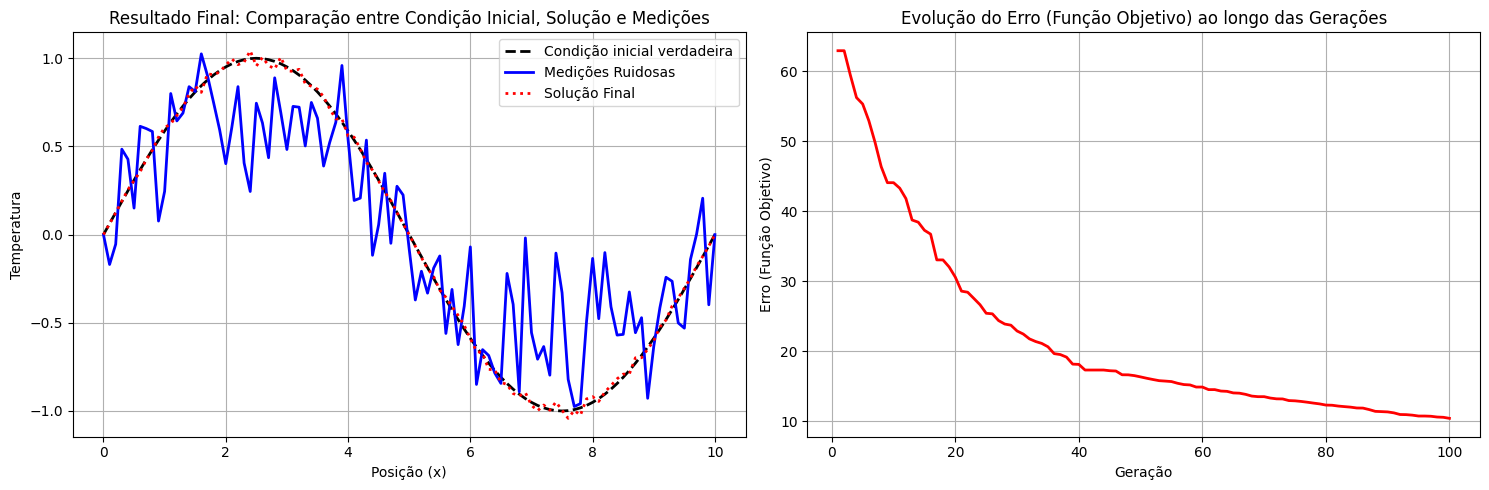

In [26]:
import matplotlib.pyplot as plt

# Visualização dos Resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Dois gráficos (um embaixo do outro)

# Gráfico 1: Melhor solução encontrada vs condição inicial verdadeira vs medições ruidosas
axes[0].plot(x, true_initial_condition, 'k--', label="Condição inicial verdadeira", linewidth=2)  # Condição inicial
axes[0].plot(x, best_solution, label="Medições Ruidosas", color='b', linewidth=2)  # Solução do problema de condução de calor
axes[0].plot(x, T_obs, label="Solução Final", color='r', linestyle='dotted', linewidth=2)  # Temperaturas com ruído
axes[0].set_title("Resultado Final: Comparação entre Condição Inicial, Solução e Medições")
axes[0].set_xlabel("Posição (x)")
axes[0].set_ylabel("Temperatura")
axes[0].legend()
axes[0].grid()

# Gráfico 2: Evolução do Erro (Função Objetivo) ao longo das Gerações
axes[1].plot(range(1, len(best_solutions) + 1), best_solutions, color='r', linewidth=2)  # Evolução do erro ao longo das gerações
axes[1].set_title("Evolução do Erro (Função Objetivo) ao longo das Gerações")
axes[1].set_xlabel("Geração")
axes[1].set_ylabel("Erro (Função Objetivo)")
axes[1].grid()

# Ajuste final e exibição dos gráficos
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()


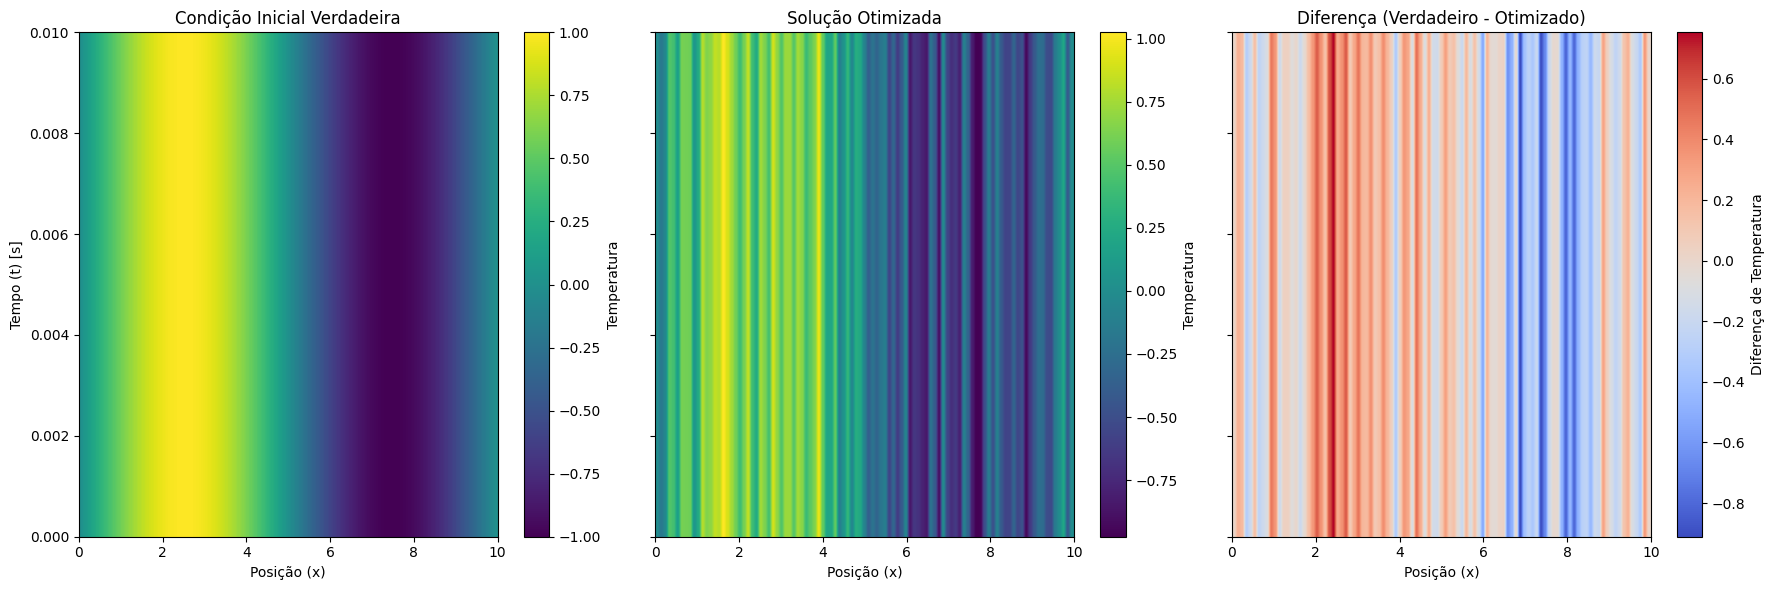

In [27]:
import matplotlib.pyplot as plt
import numpy as np

num_time_steps = 251

# Gerar as soluções para múltiplos tempos (evolução da temperatura)
true_values = np.array([solve_heat_equation(true_initial_condition) for _ in range(num_time_steps)])
optimized_values = np.array([solve_heat_equation(best_solution) for _ in range(num_time_steps)])

# Calcular a diferença entre as duas soluções
difference = true_values - optimized_values

# Criar figura para três gráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Gerar o eixo de tempo (linspace para ter o mesmo número de passos)
time_steps = np.linspace(0, tau, len(true_values[0]))

# Convertendo para 2D para uso com imshow
true_values_2d = np.tile(true_values, (len(time_steps), 1))  # Repetir as linhas para representar a evolução no tempo
optimized_values_2d = np.tile(optimized_values, (len(time_steps), 1))  # Repetir as linhas
difference_2d = np.tile(difference, (len(time_steps), 1))  # Repetir as linhas

# Heatmap da condição verdadeira
im1 = axes[0].imshow(true_values_2d, aspect='auto', cmap='viridis', extent=[0, Lx, 0, tau])
axes[0].set_title("Condição Inicial Verdadeira")
axes[0].set_xlabel("Posição (x)")
axes[0].set_ylabel("Tempo (t) [s]")
fig.colorbar(im1, ax=axes[0], label="Temperatura")

# Heatmap da solução otimizada
im2 = axes[1].imshow(optimized_values_2d, aspect='auto', cmap='viridis', extent=[0, Lx, 0, tau])
axes[1].set_title("Solução Otimizada")
axes[1].set_xlabel("Posição (x)")
fig.colorbar(im2, ax=axes[1], label="Temperatura")

# Heatmap da diferença
im3 = axes[2].imshow(difference_2d, aspect='auto', cmap='coolwarm', extent=[0, Lx, 0, tau])
axes[2].set_title("Diferença (Verdadeiro - Otimizado)")
axes[2].set_xlabel("Posição (x)")
fig.colorbar(im3, ax=axes[2], label="Diferença de Temperatura")

# Ajuste do layout
plt.tight_layout()
plt.show()


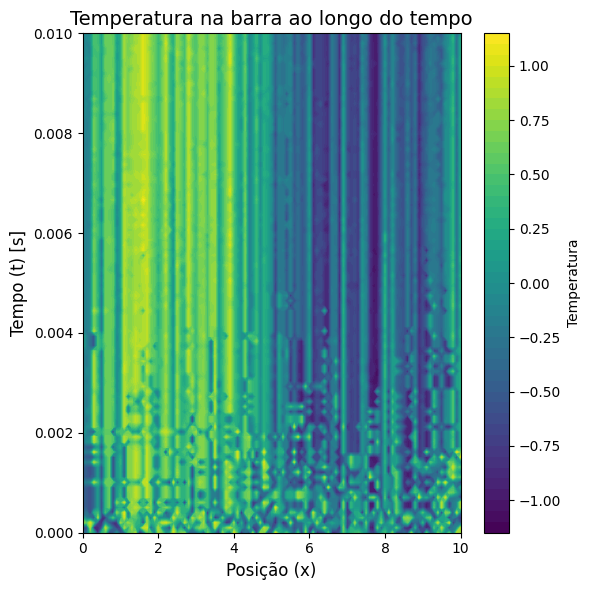

In [28]:
# Visualizando a evolução das temperaturas ao longo do tempo com um mapa de calor
plt.figure(figsize=(6, 6))

# Suponhamos que 'solutions_over_time' seja uma lista com as soluções de temperatura ao longo do tempo
# Aqui, 'solutions_over_time' deve ser uma matriz onde cada linha é uma solução em um passo de tempo

# Em 'solutions_over_time', as colunas seriam as temperaturas ao longo das posições 'x' para cada 't'

# T_values seria uma matriz 2D com a forma (n_tempos, n_posicoes)

T_values = np.array(solutions_over_time)

# Criando o eixo de tempo: linspace de 0 até tau com base na quantidade de passos temporais
time_steps = np.linspace(0, tau, len(T_values))

# Plotando o mapa de calor
plt.contourf(x, time_steps, T_values, cmap='viridis', levels=50)
plt.colorbar(label="Temperatura")

plt.title("Temperatura na barra ao longo do tempo", fontsize=14)
plt.xlabel("Posição (x)", fontsize=12)
plt.ylabel("Tempo (t) [s]", fontsize=12)
plt.tight_layout()
plt.show()


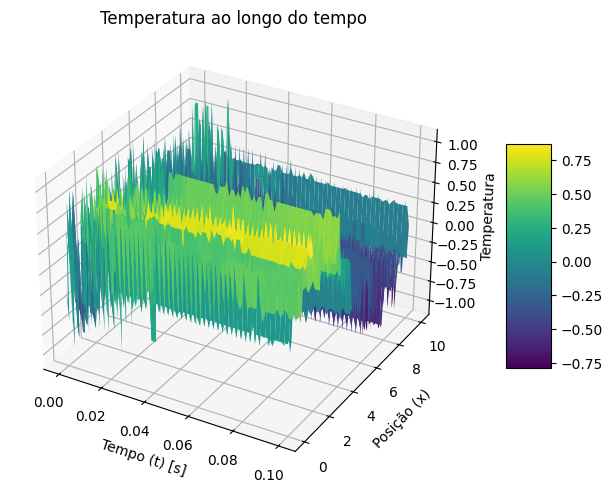

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Visualização dos Resultados
fig = plt.figure(figsize=(10, 5))

# Adicionar um subplot 3D
ax = fig.add_subplot(111, projection='3d')

# Definir a variável de tempo (já que t = 10^-2 segundos, temos o número de passos de tempo de acordo com sua simulação)
time_steps = len(solutions_over_time)  # Total de passos de tempo
t_values = np.linspace(0, 10e-2, time_steps)  # Assumindo t = 10^-2 segundos como limite

# Criar uma matriz de Z para a evolução das temperaturas
T_values = np.array([solutions_over_time[i] for i in range(time_steps)])

# t (tempo) no eixo Z, x na frente e a temperatura será a cor
T, X = np.meshgrid(t_values, x)

# Plotando a superfície 3D, com t na frente (no eixo Z)
surf = ax.plot_surface(T, X, T_values.T, cmap='viridis', edgecolor='none')

# Adicionando título e rótulos aos eixos
ax.set_title("Temperatura ao longo do tempo")
ax.set_xlabel("Tempo (t) [s]")
ax.set_ylabel("Posição (x)")
ax.set_zlabel("Temperatura")

# Adicionando a barra de cores para indicar os valores de temperatura
fig.colorbar(surf, shrink=0.5, aspect=5)

# Ajuste final para exibição
plt.tight_layout()
plt.show()


In [30]:
# Verificação das condições de contorno
def check_conditions(T_final, dx):
    """
    Verifica se as condições de contorno
    são satisfeitas nas extremidades da barra.
    As condições indicam derivadas nulas nas extremidades (fluxo de calor zero).
    """
    # Calcula as derivadas nas extremidades
    left_derivative = (T_final[1] - T_final[0]) / dx  # Derivada à esquerda (x=0)
    right_derivative = (T_final[-1] - T_final[-2]) / dx  # Derivada à direita (x=Lx)

    # Verifica se as derivadas são zero (aproximadamente, com uma tolerância)
    tolerance = 1e-5
    if abs(left_derivative) < tolerance:
        print(f"Condição de contorno satisfeita na extremidade esquerda (x=0): Derivada = {left_derivative:.5f}")
    else:
        print(f"Derivada na extremidade esquerda (x=0) = {left_derivative:.5f}")

    if abs(right_derivative) < tolerance:
        print(f"Condição de contorno satisfeita na extremidade direita (x=Lx): Derivada = {right_derivative:.5f}")
    else:
        print(f"Derivada na extremidade direita (x=Lx) = {right_derivative:.5f}")

    # Retorna os valores das derivadas para análise adicional
    return left_derivative, right_derivative

# Verificar após a solução do problema direto
left_d, right_d = check_conditions(best_solution, dx)


Derivada na extremidade esquerda (x=0) = -1.69316
Derivada na extremidade direita (x=Lx) = 3.97815
